In [145]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [146]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [147]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

ตรวจสอบค่าว่าง (null/NaN)

In [148]:
print(train_data.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [149]:
print(test_data.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


ตรวจสอบค่าที่เกิดขึ้นบ่อยที่สุดในแต่ละคอลัมน์

In [150]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

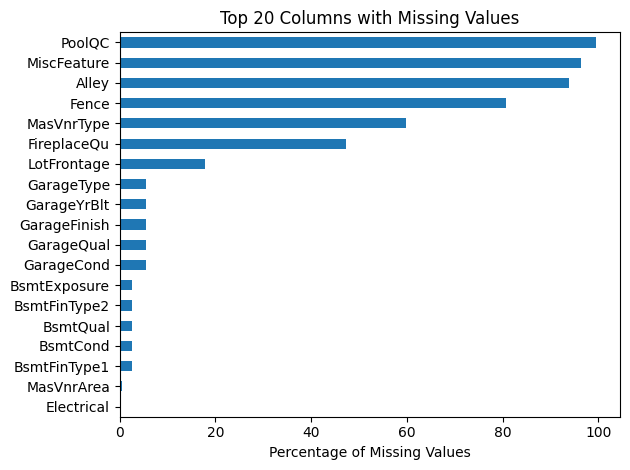

In [151]:
import matplotlib.pyplot as plt

missing_summary.head(20).plot(kind='barh')
plt.xlabel('Percentage of Missing Values')
plt.title('Top 20 Columns with Missing Values')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

เลือก Feature  มีความสัมพันธ์กับราคาบ้าน

In [152]:
# เลือกเฉพาะคอลัมน์ที่เป็นตัวเลข
numeric_data = train_data.select_dtypes(include=['int64', 'float64'])

# คำนวณความสัมพันธ์
correlation = numeric_data.corr()

# แสดงคอลัมน์ที่สัมพันธ์กับราคาบ้านมากที่สุด
print(correlation['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

เลือก Feature

In [153]:
y = train_data.SalePrice

ไม่มี missing values และมีความสัมพันธ์สูงกับ SalePrice

In [ ]:
feature = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']

In [156]:
X = train_data[feature]
X_test = test_data[feature]

Split for Validation 
เพราะ test ไม่มี price

In [157]:
X_train,X_val,y_train,y_val = train_test_split(X,y,random_state=42)

อยากรู้ว่าโมเดลแม่นแค่ไหนก่อนใช้งานจริง

In [158]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

ค่าที่คาดเคลื่อน

In [159]:
val_preds =  forest_model.predict(X_val)
val_mae = mean_absolute_error(y_val,val_preds)
print("MAE on validation set: {:.2f}".format(val_mae))

MAE on validation set: 18582.44


ราคาบ้านเฉลี่ย

In [160]:
print(y.mean())

180921.19589041095


Train Model and Predict

In [161]:
final_model = RandomForestRegressor(random_state=42)
final_model.fit(X,y)
test_preds = forest_model.predict(X_test)

In [162]:
submission = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': test_preds
})

In [163]:
print(submission.head(10))

     Id  SalePrice
0  1461  122947.83
1  1462  130641.00
2  1463  173585.40
3  1464  189557.00
4  1465  225013.24
5  1466  187726.00
6  1467  173230.10
7  1468  177389.72
8  1469  183039.30
9  1470  109140.00


In [164]:
submission.to_csv('submission.csv', index=False)
print("submission.csv created")

submission.csv created


ลองวิเคราะห์ด้วยกราฟ

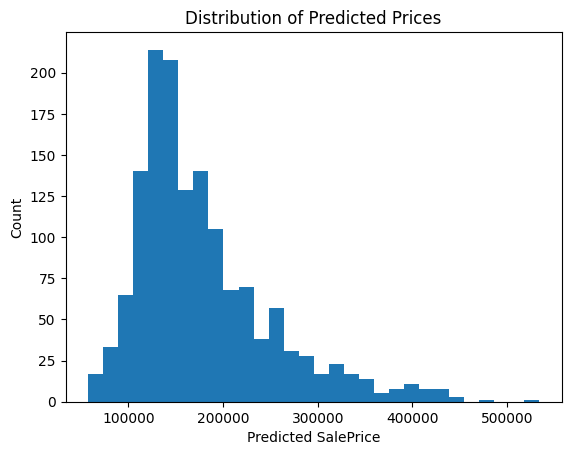

In [165]:
import matplotlib.pyplot as plt

plt.hist(test_preds, bins=30)
plt.xlabel('Predicted SalePrice')
plt.ylabel('Count')
plt.title('Distribution of Predicted Prices')
plt.show()

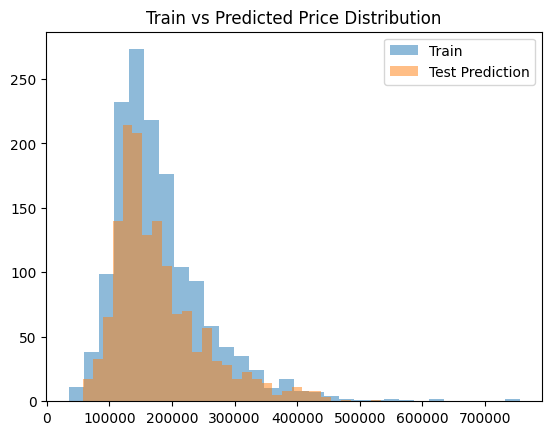

In [166]:
plt.hist(y, bins=30, alpha=0.5, label='Train')
plt.hist(test_preds, bins=30, alpha=0.5, label='Test Prediction')
plt.legend()
plt.title("Train vs Predicted Price Distribution")
plt.show()